In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


import detect_and_track as dt

In [2]:
dloc = Path("/Users/brianpm/Documents")
m1_lock = xr.open_dataset(dloc/"pr_events_6hr_B1850_c201_CLOCK.nc")
m1_cntl = xr.open_dataset(dloc/"pr_events_6hr_B1850_c201_CTL.nc")
m2_lock = xr.open_dataset(dloc/"pr_events_6hr_tovrlp_B1850_c201_CLOCK.nc")
m2_cntl = xr.open_dataset(dloc/"pr_events_6hr_tovrlp_B1850_c201_CTL.nc")

In [4]:
m1_cntl_stats = dt.get_duration_and_size(m1_cntl['precip_events'])

In [30]:
m1_lock_stats = dt.get_duration_and_size(m1_lock['precip_events'])

In [26]:
# histogram of duration (in hours)
be1 = [0, 15, 21, 27, 33, 39, 45, 51, 57, 63, 78, 90, (m1_cntl_stats['duration']*6).max()]
h1, be1 = np.histogram(m1_cntl_stats['duration']*6, bins=be1, density=True)
bc1 = be1[0:-1]+ 0.5*np.diff(be1)

In [31]:
be2 = [0, 15, 21, 27, 33, 39, 45, 51, 57, 63, 78, 90, (m1_lock_stats['duration']*6).max()]
h2, be2 = np.histogram(m1_lock_stats['duration']*6, bins=be2, density=True)
bc2 = be2[0:-1]+ 0.5*np.diff(be2)

In [36]:
m2_cntl_stats = dt.get_duration_and_size(m2_cntl['precip_events'])
m2_lock_stats = dt.get_duration_and_size(m2_lock['precip_events'])
ae1 = [0, 15, 21, 27, 33, 39, 45, 51, 57, 63, 78, 90, (m2_cntl_stats['duration']*6).max()]
ah1, ae1 = np.histogram(m2_cntl_stats['duration']*6, bins=ae1, density=True)
ac1 = ae1[0:-1]+ 0.5*np.diff(ae1)
ae2 = [0, 15, 21, 27, 33, 39, 45, 51, 57, 63, 78, 90, (m2_lock_stats['duration']*6).max()]
ah2, ae2 = np.histogram(m2_lock_stats['duration']*6, bins=ae2, density=True)
ac2 = ae2[0:-1]+ 0.5*np.diff(ae2)

Text(0.5, 0, 'DURATION (hours)')

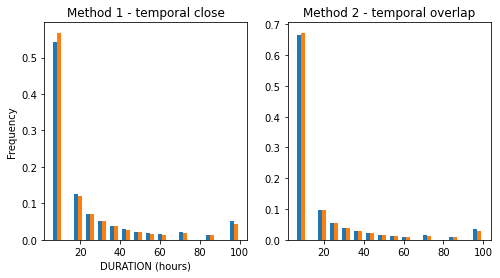

In [39]:
fig, ax = plt.subplots(figsize=(8,4), ncols=2)

bc1a = bc1.copy()
bc1a[-1] = 96
ax[0].bar(bc1a, (h1*np.diff(be1)), width=2)
bc2a = bc2.copy()
bc2a[-1] = 96
ax[0].bar(bc2a+2, h2*np.diff(be2), width=2)
ax[0].set_title("Method 1 - temporal close")


ac1a = ac1.copy()
ac1a[-1] = 96
ax[1].bar(ac1a, (ah1*np.diff(ae1)), width=2)
ac2a = ac2.copy()
ac2a[-1] = 96
ax[1].bar(ac2a+2, ah2*np.diff(ae2), width=2)
ax[1].set_title("Method 2 - temporal overlap")

ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("DURATION (hours)")


In [28]:
bc1a

array([ 7.5, 18. , 24. , 30. , 36. , 42. , 48. , 54. , 60. , 70.5, 84. ,
       96. ])

In [64]:
m1c_siz_hist, m1c_siz_edg = np.histogram(m1_cntl_stats['AvgSiz'], bins=25, density=True)
m1c_siz_ctr = m1c_siz_edg[0:-1] + 0.5*np.diff(m1c_siz_edg)
m1l_siz_hist, m1l_siz_edg = np.histogram(m1_lock_stats['AvgSiz'], bins=m1c_siz_edg, density=True)
m1l_siz_ctr = m1l_siz_edg[0:-1] + 0.5*np.diff(m1l_siz_edg)

In [105]:
m2c_siz_hist, m2c_siz_edg = np.histogram(m2_cntl_stats['AvgSiz'], bins=25, density=True)
m2c_siz_ctr = m2c_siz_edg[0:-1] + 0.5*np.diff(m2c_siz_edg)
m2l_siz_hist, m2l_siz_edg = np.histogram(m2_lock_stats['AvgSiz'], bins=m2c_siz_edg, density=True)
m2l_siz_ctr = m2l_siz_edg[0:-1] + 0.5*np.diff(m2l_siz_edg)

[]

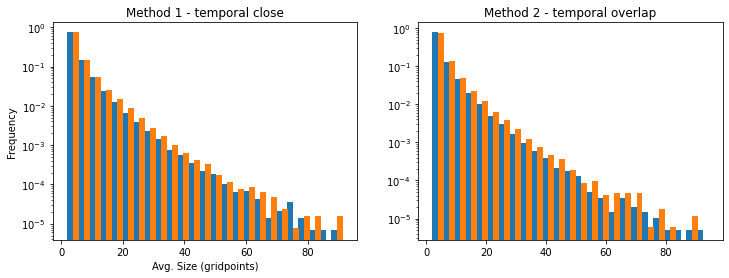

In [107]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)

ax[0].bar(m1c_siz_ctr, (m1c_siz_hist*np.diff(m1c_siz_edg)), width=2)
ax[0].bar(m1l_siz_ctr+2, m1l_siz_hist*np.diff(m1l_siz_edg), width=2)
ax[0].set_title("Method 1 - temporal close")


ax[1].bar(m2c_siz_ctr, (m2c_siz_hist*np.diff(m2c_siz_edg)), width=2)
ax[1].bar(m2l_siz_ctr+2, m2l_siz_hist*np.diff(m2l_siz_edg), width=2)
ax[1].set_title("Method 2 - temporal overlap")

ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Avg. Size (gridpoints)")

# ax[0].set_ylim([0, 0.2])
# ax[1].set_ylim([0, 0.2])
ax[0].semilogy()
ax[1].semilogy()

In [104]:
m2c_siz_ctr - m2l_siz_ctr

array([0.05572398, 0.16717195, 0.27861991, 0.39006787, 0.50151584,
       0.6129638 , 0.72441176, 0.83585973, 0.94730769, 1.05875566,
       1.17020362, 1.28165158, 1.39309955, 1.50454751, 1.61599548,
       1.72744344, 1.8388914 , 1.95033937, 2.06178733, 2.17323529,
       2.28468326, 2.39613122, 2.50757919, 2.61902715, 2.73047511])

In [63]:
m1l_siz_hist

array([0.        , 0.10595372, 0.        , 0.05936319, 0.03471835,
       0.        , 0.02033802, 0.        , 0.01462591, 0.0110854 ,
       0.        , 0.0080588 , 0.        , 0.00590994, 0.00485256,
       0.        , 0.00400212, 0.        , 0.00316076, 0.00235124,
       0.        , 0.00209656, 0.        , 0.00185325, 0.00137345])

In [82]:
(m1_lock['time.year'] >= 22) & (m1_lock['time.year'] <= 27)

<xarray.DataArray 'year' (time: 37961)>
array([False, False, False, ...,  True,  True,  True])
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0026-12-31 21:00:00

In [84]:
m1_lock_nt = dt.get_events_per_time(m1_lock['precip_events'])

In [85]:
m1_cntl_nt = dt.get_events_per_time(m1_cntl['precip_events'])

In [90]:
m1_cntl_nt = xr.DataArray(m1_cntl_nt, coords={"time":m1_cntl['time']}, dims="time")
m1_cntl_nt

<xarray.DataArray (time: 43925)>
array([17, 11, 12, ..., 10, 11, 11])
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0031-01-31 21:00:00

In [91]:
m1_lock_nt = xr.DataArray(m1_lock_nt, coords={"time":m1_lock['time']}, dims="time")
m1_lock_nt

<xarray.DataArray (time: 37961)>
array([15,  9,  9, ..., 14, 10, 11])
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0026-12-31 21:00:00

In [99]:
m1_cntl_nty = m1_cntl_nt.groupby("time.year").sum(dim='time')
m1_lock_nty = m1_lock_nt.groupby("time.year").sum(dim="time")

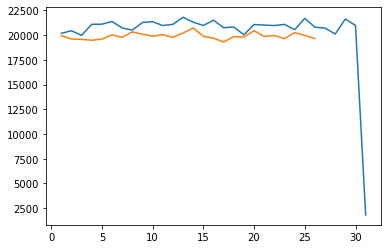

In [100]:
fig, ax = plt.subplots()
ax.plot(m1_cntl_nty['year'], m1_cntl_nty)
ax.plot(m1_lock_nty['year'], m1_lock_nty)